In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [2]:
train_X = pd.read_pickle('generated_files/train_X.pkl')
train_Y = pd.read_pickle('generated_files/train_Y.pkl')

test_X = pd.read_pickle('generated_files/test_X.pkl')
test_Y = pd.read_pickle('generated_files/test_Y.pkl')

In [81]:
def reduce_train(train_X, train_Y):
    is_changed_series = train_Y.sum(axis=1) > 0
    
    X_reduced = train_X[is_changed_series].reset_index(drop=True)
    Y_reduced = train_Y[is_changed_series].reset_index(drop=True)
    
    return X_reduced, Y_reduced

In [82]:
X_tr_reduced, Y_tr_reduced = reduce_train(train_X, train_Y)

In [83]:
print("reduction ratio:")
len(X_tr_reduced) / len(train_X)

reduction ratio:


0.035697406658823295

In [84]:
X_tr_reduced

,Customer_Code,Row_Date,Sex,Age,Customer_Seniority_Months,Province_Name,Is_Active,Gross_Household_Income,Segmentation,FT_Saving_Account,...,FT_Mortgage,FT_Pensions1,FT_Loans,FT_Taxes,FT_Credit_Card,FT_Securities,FT_Home_Account,FT_Payroll,FT_Pensions2,FT_Direct_Debit
0,15889,2015-04-28,V,56.000,245.000,MADRID,1.000,326124.900,01 - TOP,0,...,0,0,0,0,0,1,0,0.000,0.000,0
1,15889,2015-11-28,V,56.000,249.000,MADRID,1.000,326124.900,01 - TOP,0,...,0,0,0,0,0,1,0,0.000,0.000,0
2,15889,2016-02-28,V,56.000,252.000,MADRID,1.000,326124.900,01 - TOP,0,...,0,0,0,0,0,1,0,0.000,0.000,0
3,15889,2016-04-28,V,56.000,254.000,MADRID,1.000,326124.900,01 - TOP,0,...,0,0,0,0,0,1,0,0.000,0.000,0
4,15897,2015-03-28,V,61.000,246.000,MADRID,1.000,175450.050,01 - TOP,0,...,0,1,0,1,1,1,0,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14195,1547487,2016-04-28,H,30.000,0.000,MADRID,0.000,134227.486,02 - PARTICULARES,0,...,0,0,0,0,0,0,0,0.000,0.000,0
14196,1547606,2016-04-28,V,37.000,0.000,VALENCIA,0.000,134227.486,02 - PARTICULARES,0,...,0,0,0,0,0,0,0,0.000,0.000,0
14197,1547704,2016-04-28,V,76.000,0.000,MADRID,0.000,134227.486,02 - PARTICULARES,0,...,0,0,0,0,0,0,0,0.000,0.000,0
14198,1547995,2016-04-28,H,42.000,0.000,"BALEARS, ILLES",1.000,134227.486,02 - PARTICULARES,0,...,0,0,0,0,0,0,0,0.000,0.000,0


In [ ]:
# 5 baselines:
#    is label missing and `global trend * size` is high?
#    is label missing and correlated with current predictors?
#    linear combination of both
#    random forest
#    logistic regression

In [57]:
prediction_features = [col for col in train_X.columns if 'FT_' in col]
features_trend = train_X.groupby('Row_Date').sum()[prediction_features]
features_trend.index = pd.date_range('2015-01-28', periods=len(features_trend), freq='1M')
features_trend

,FT_Saving_Account,FT_Guarantees,FT_Current_Accounts,FT_Derivada_Account,FT_Payroll_Account,FT_Junior_Account,FT_Más_particular_Account,FT_particular_Account,FT_particular_Plus_Account,FT_Short_term_deposits,...,FT_Mortgage,FT_Pensions1,FT_Loans,FT_Taxes,FT_Credit_Card,FT_Securities,FT_Home_Account,FT_Payroll,FT_Pensions2,FT_Direct_Debit
2015-01-31,3,0,15292,7,1865,213,258,3322,1119,52,...,173,236,73,1199,1146,624,104,1198.0,1334.0,3032
2015-02-28,3,0,15318,6,1897,211,255,3306,1112,69,...,172,237,73,1205,1115,624,105,1272.0,1398.0,2982
2015-03-31,3,0,15332,6,1933,212,241,3286,1107,70,...,171,236,74,1211,1093,619,105,1364.0,1401.0,3087
2015-04-30,3,0,15314,6,1971,209,231,3269,1104,72,...,171,235,73,1237,1126,614,102,1339.0,1476.0,3126
2015-05-31,3,0,15320,6,2004,207,221,3256,1100,67,...,167,237,65,1260,1116,620,102,1294.0,1332.0,3078
2015-06-30,3,0,15471,7,1903,210,215,3249,1099,65,...,164,235,65,1316,1132,616,102,1375.0,1511.0,3136
2015-07-31,3,0,15777,6,1965,210,219,3242,1091,63,...,164,234,64,1328,1180,616,102,1413.0,1569.0,3178
2015-08-31,3,0,16124,7,2012,208,217,3232,1083,65,...,164,235,63,1335,1155,624,100,1357.0,1498.0,3048
2015-09-30,3,0,16637,7,2042,207,219,3223,1075,61,...,164,234,63,1340,1126,633,99,1359.0,1502.0,3239
2015-10-31,3,0,17152,7,2081,208,224,3209,1077,64,...,162,230,63,1359,1143,650,99,1400.0,1545.0,3329


-0.09436244858456416


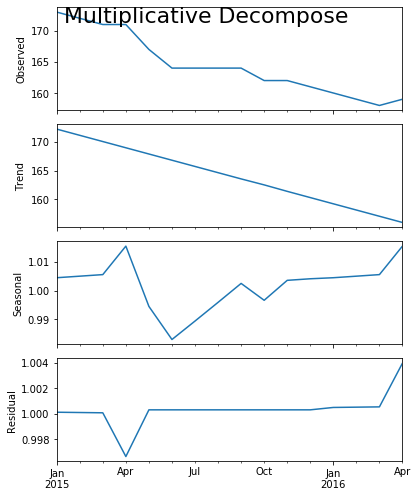

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(features_trend['FT_Mortgage'], model='multiplicative', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (6,7)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
print((result_mul.trend[-1] - result_mul.trend[0]) / result_mul.trend[0])
plt.show()

In [59]:
def ratio_trend(series):
    mul_decompose = seasonal_decompose(series, model='additive', extrapolate_trend='freq')
    trend = (mul_decompose.trend[-1] - mul_decompose.trend[0]) / mul_decompose.trend[0]
    return trend

def absolute_trend(series):
    mul_decompose = seasonal_decompose(series, model='additive', extrapolate_trend='freq')
    trend = mul_decompose.trend[-1] - mul_decompose.trend[0]
    return trend

In [65]:
ratio_trends = pd.Series([ratio_trend(features_trend[col]) for col in features_trend.columns], index=features_trend.columns)
ratio_trends[ratio_trends > 0].sort_values(ascending=False)

/home/user279/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


FT_Derivada_Account   0.370
FT_Payroll_Account    0.204
FT_Taxes              0.202
FT_e-account          0.195
FT_Current_Accounts   0.191
FT_Direct_Debit       0.174
FT_Securities         0.120
FT_Pensions2          0.098
FT_Payroll            0.090
FT_Funds              0.014
FT_Saving_Account     0.000
dtype: float64

In [64]:
abs_trends = pd.Series([absolute_trend(features_trend[col]) for col in features_trend.columns], index=features_trend.columns)
abs_trends[abs_trends > 0].sort_values(ascending=False)

FT_Current_Accounts   2861.563
FT_Direct_Debit        515.625
FT_Payroll_Account     378.750
FT_e-account           360.937
FT_Taxes               243.750
FT_Pensions2           138.750
FT_Payroll             117.500
FT_Securities           72.187
FT_Funds                 6.563
FT_Derivada_Account      2.188
FT_Saving_Account        0.000
dtype: float64

In [224]:
abs_changes = Y_tr_reduced.sum()
abs_changes[abs_changes > 0].sort_values(ascending=False)[:12]

FT_Direct_Debit             4917.000
FT_Pensions2                2775.000
FT_Payroll                  2412.000
FT_Credit_Card              2222.000
FT_Current_Accounts         2175.000
FT_Payroll_Account          1236.000
FT_e-account                 734.000
FT_Long_term_deposits        384.000
FT_Taxes                     302.000
FT_Más_particular_Account    184.000
FT_Securities                155.000
FT_particular_Account        122.000
dtype: float64

In [295]:
chosen_trend = abs_changes

In [296]:
def predict_trend_baseline(X, label_strength, n_labels):
    chosen_labels = label_strength[label_strength > 0].sort_values(ascending=False).head(n_labels).index
    label_weight = label_strength / label_strength.sum()
    
    Y = X[prediction_features].copy()
    Y.loc[:,prediction_features] = 0
    Y.loc[:,chosen_labels] = 1 * ~X[chosen_labels].astype('bool') * label_weight
    
    return Y

In [336]:
def visualize_results(label_strength, max_n_labels, name, i):
    success_rate = np.array([mapk(transform_y(Y_tr_reduced, thresh=0.01),
                                  transform_y(predict_trend_baseline(X_tr_reduced, label_strength, i),
                                              thresh=0.01), k=7) 
                          for i in range(1, max_n_labels)])

    plt.subplot(1,3,i)
    plt.title(f"mapk@7 for {name} trend")
    plt.xlabel("n_labels")
    plt.ylabel("mapk@7")
    pd.Series(success_rate, index=list(range(1, max_n_labels))).plot()

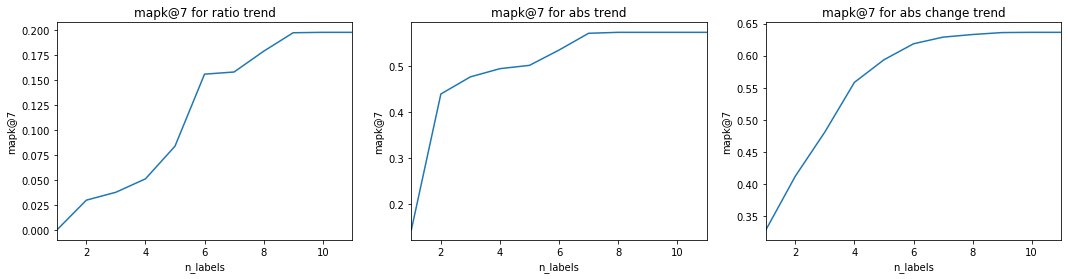

In [337]:
plt.figure(figsize=(18,4))
visualize_results(ratio_trends, 12, "ratio", 1)
visualize_results(abs_trends, 12, "abs", 2)
visualize_results(abs_changes, 12, "abs change", 3)

In [338]:
def compute_binary_assymetric_correlation(feature_df):
    corr_mat = pd.DataFrame(columns=feature_df.columns, dtype='float64')

    for col1 in feature_df.columns:
        for col2 in feature_df.columns:
            f1, f2 = feature_df[col1], feature_df[col2]
            corr_mat.loc[col1, col2] = (f1 * f2).sum() / (f1.sum() or 1)
    
    return corr_mat

binary_corr = compute_binary_assymetric_correlation(X_tr_reduced[prediction_features])

binary_corr

,FT_Saving_Account,FT_Guarantees,FT_Current_Accounts,FT_Derivada_Account,FT_Payroll_Account,FT_Junior_Account,FT_Más_particular_Account,FT_particular_Account,FT_particular_Plus_Account,FT_Short_term_deposits,...,FT_Mortgage,FT_Pensions1,FT_Loans,FT_Taxes,FT_Credit_Card,FT_Securities,FT_Home_Account,FT_Payroll,FT_Pensions2,FT_Direct_Debit
FT_Saving_Account,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FT_Guarantees,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FT_Current_Accounts,0.000,0.000,1.000,0.001,0.060,0.000,0.027,0.179,0.082,0.008,...,0.008,0.017,0.001,0.116,0.077,0.062,0.007,0.070,0.075,0.205
FT_Derivada_Account,0.000,0.000,0.429,1.000,0.571,0.000,0.000,0.643,0.000,0.000,...,0.000,0.000,0.000,0.643,0.429,0.286,0.000,0.214,0.214,0.643
FT_Payroll_Account,0.000,0.000,0.098,0.002,1.000,0.000,0.023,0.151,0.177,0.002,...,0.038,0.037,0.002,0.265,0.203,0.086,0.010,0.351,0.383,0.580
FT_Junior_Account,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.030,0.000
FT_Más_particular_Account,0.000,0.000,0.490,0.000,0.257,0.000,1.000,0.000,0.010,0.015,...,0.010,0.002,0.002,0.095,0.073,0.029,0.000,0.136,0.150,0.248
FT_particular_Account,0.000,0.000,0.618,0.004,0.320,0.000,0.000,1.000,0.164,0.000,...,0.023,0.053,0.002,0.217,0.171,0.145,0.021,0.159,0.167,0.351
FT_particular_Plus_Account,0.000,0.000,0.431,0.000,0.573,0.000,0.003,0.250,1.000,0.002,...,0.045,0.051,0.002,0.360,0.231,0.136,0.028,0.272,0.298,0.562
FT_Short_term_deposits,0.000,0.000,0.397,0.000,0.064,0.000,0.043,0.007,0.021,1.000,...,0.000,0.000,0.000,0.028,0.050,0.007,0.000,0.035,0.057,0.092
